In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import janitor
import re

In [3]:
warnings.filterwarnings('ignore')

In [4]:
%matplotlib inline
sns.set_style("whitegrid")

In [5]:
df =  pd.read_csv('./datasets/adult.csv')

In [6]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
## checking the shape of our dataframe
df.shape

(32561, 15)

In [9]:
## checking the names of the columns of the dataframe
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')

In [10]:
## cleaning columns names using janitor
## janitor is poweful library to clean the column names in the dataframe, which basically removes the white spaces 
## replace the white spaces with _ 
df = df.clean_names()
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'country', 'salary'],
      dtype='object')

In [11]:
## checking the nullvalue present in the dataframe
df.isnull()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32559,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
country           0
salary            0
dtype: int64

Text(0.5, 1.0, 'Distribution of missing values in the dataframe')

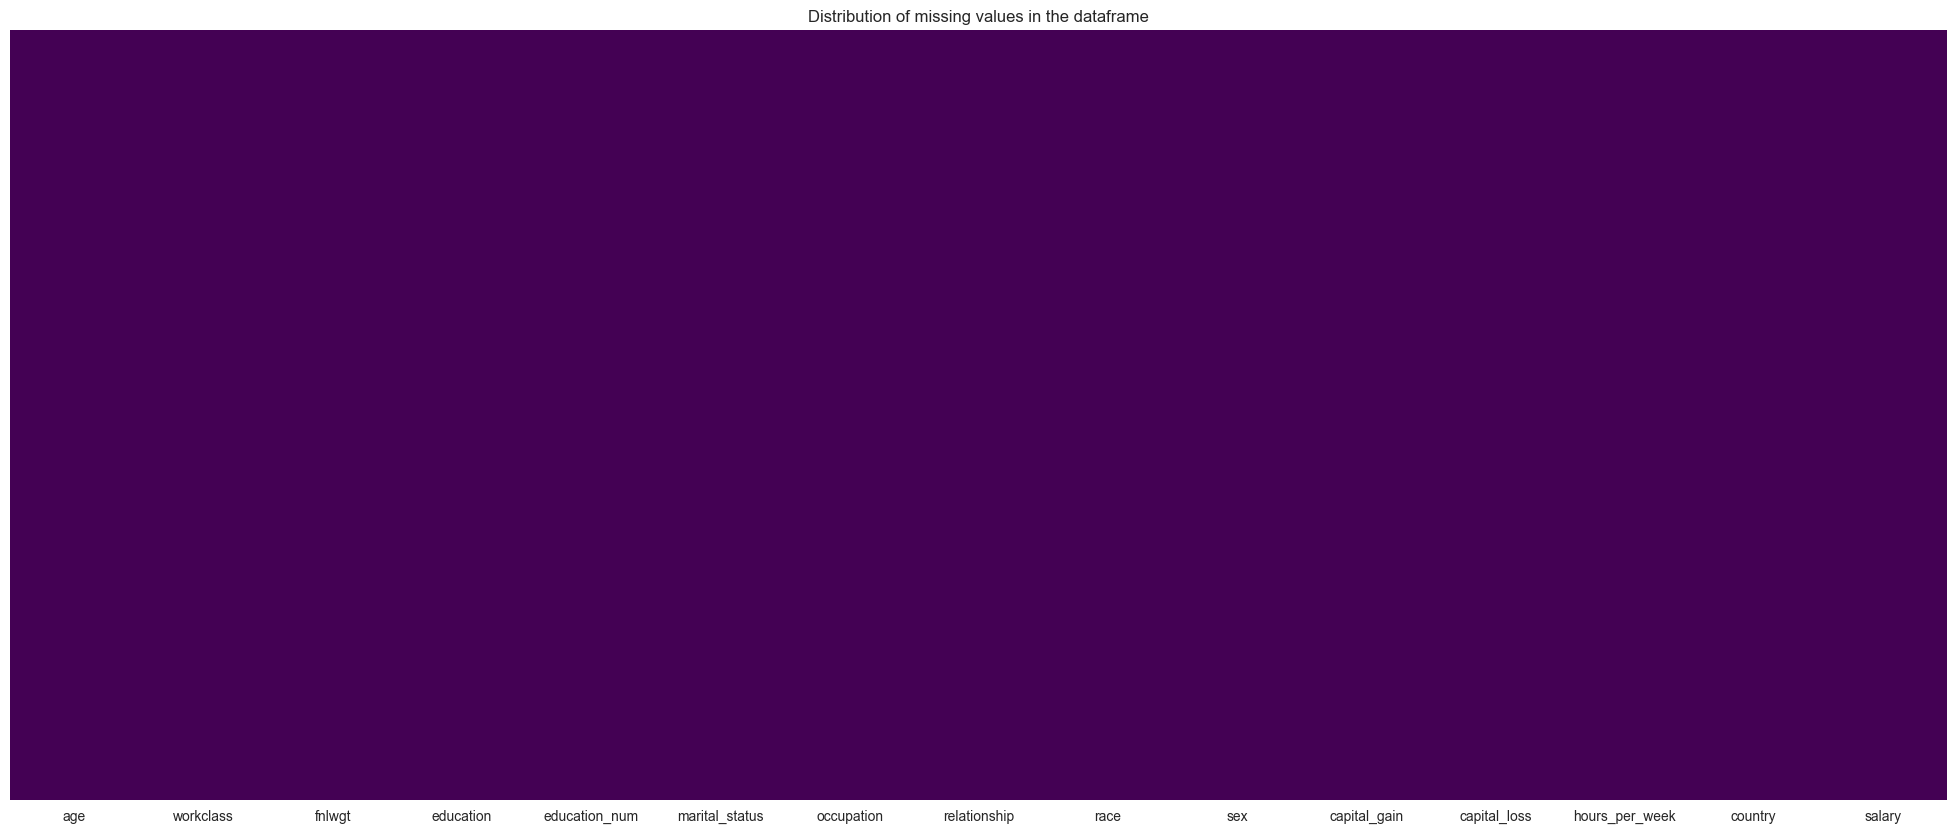

In [13]:
## plotting a heamap of the null values present in the dataframe
plt.figure(figsize=(25,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title("Distribution of missing values in the dataframe")

In [14]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [15]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education_num        16
marital_status        7
occupation           15
relationship          6
race                  5
sex                   2
capital_gain        119
capital_loss         92
hours_per_week       94
country              42
salary                2
dtype: int64

In [16]:
df["salary"]

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: salary, Length: 32561, dtype: object

In [17]:
## seperating the numerical and categorical columns 
categorical_columns = df.select_dtypes(include = ["object"]).columns
categorical_columns

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'country', 'salary'],
      dtype='object')

In [18]:
new_categorical_columns = [col for col in categorical_columns if col != 'country']

print(new_categorical_columns)

['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'salary']


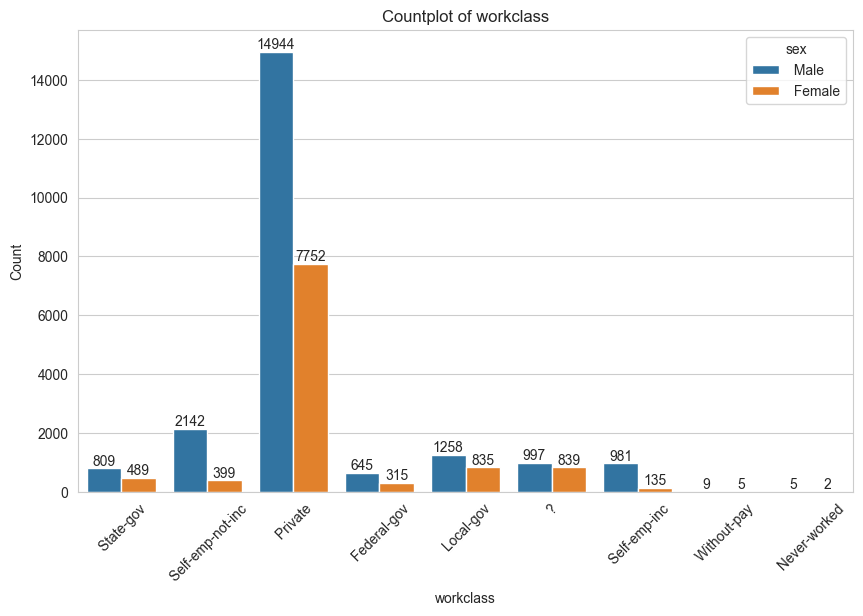

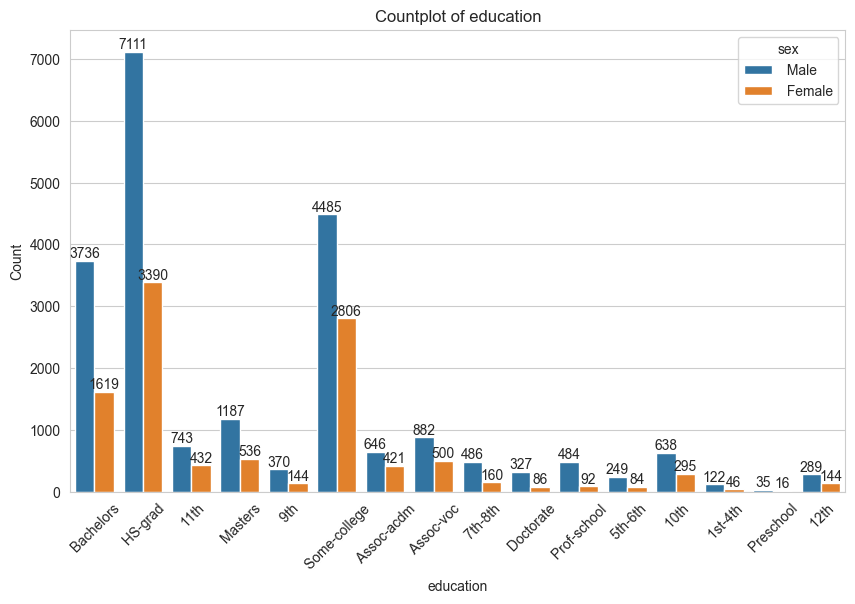

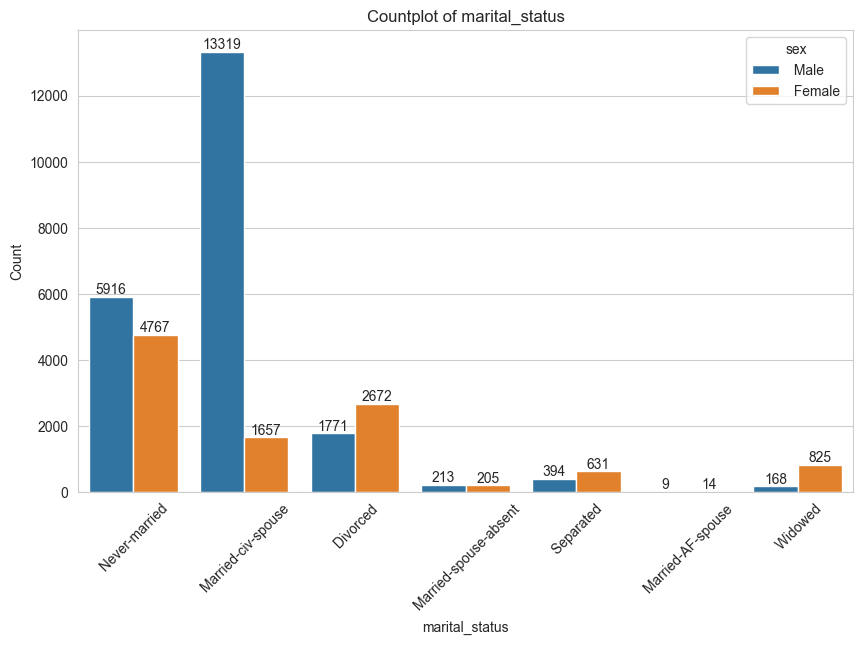

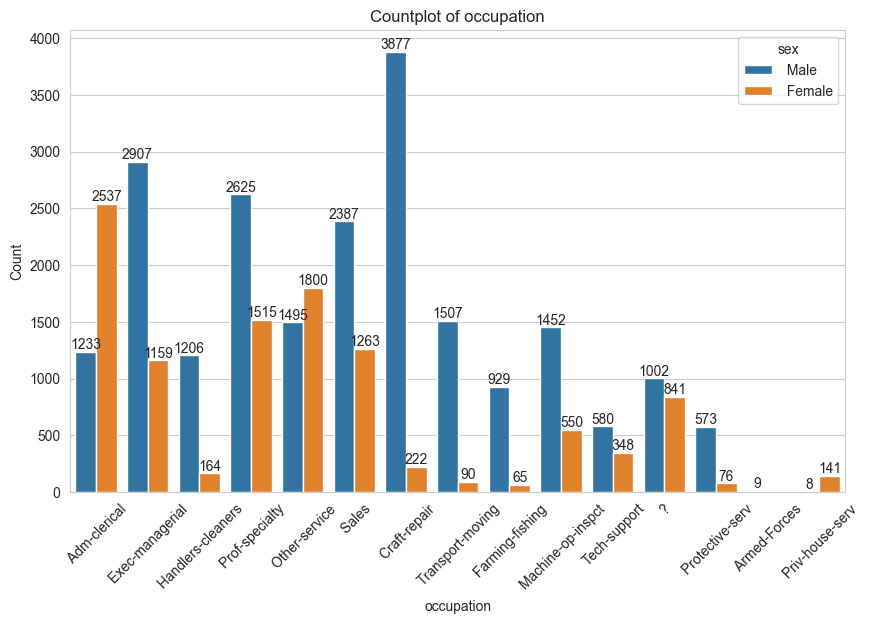

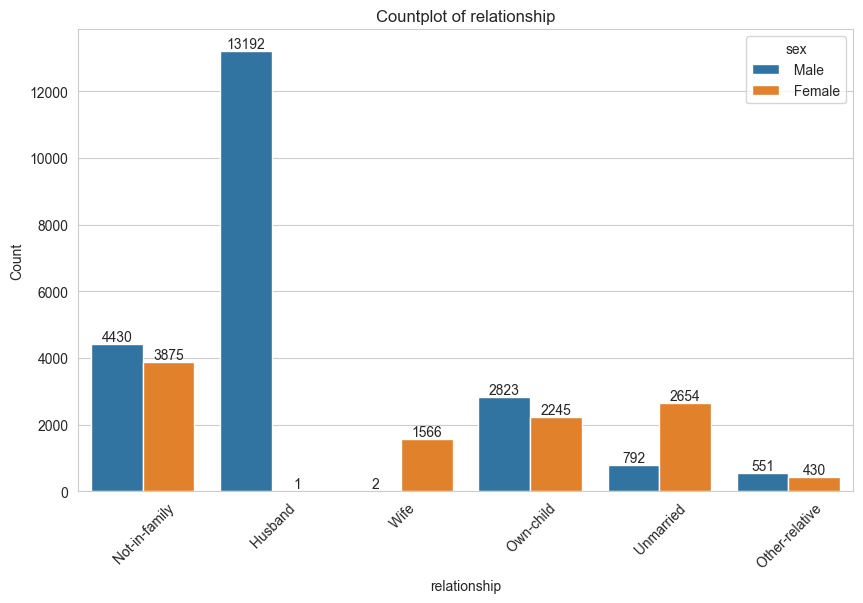

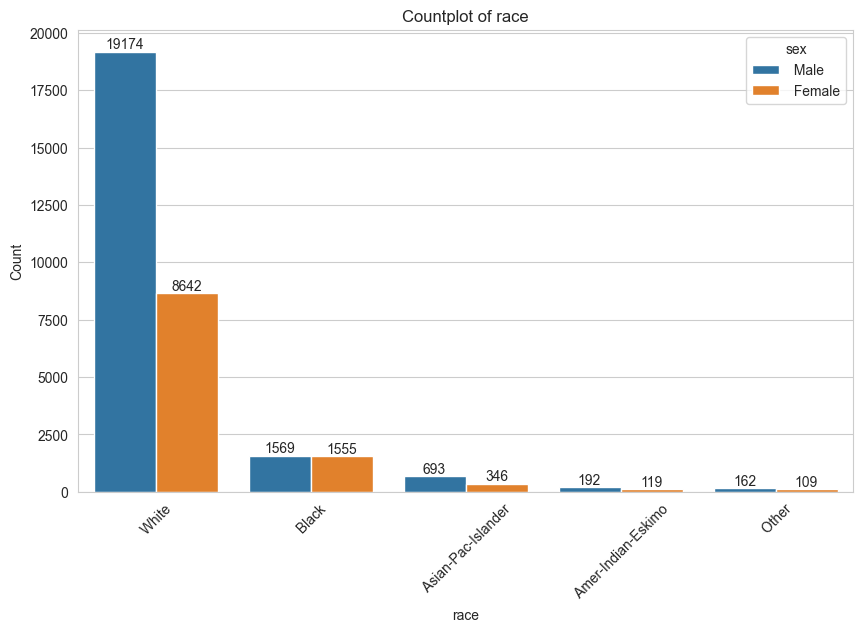

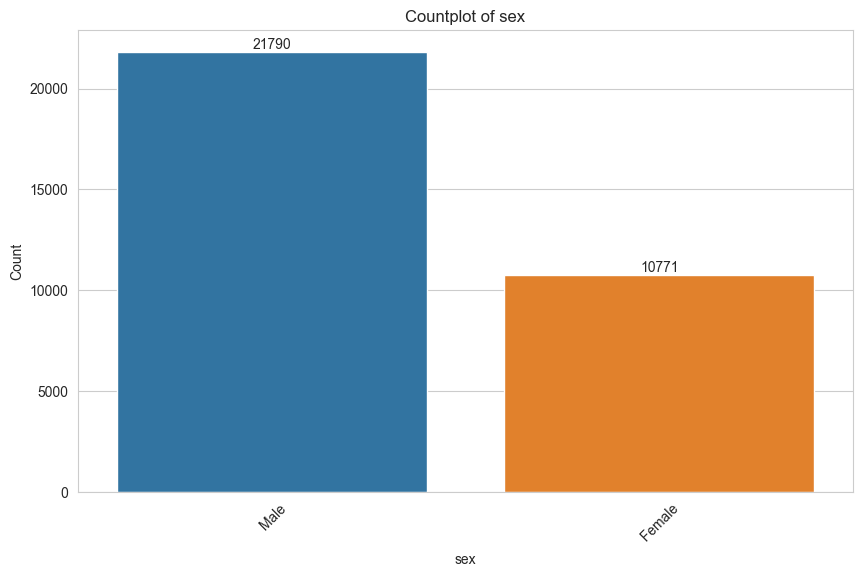

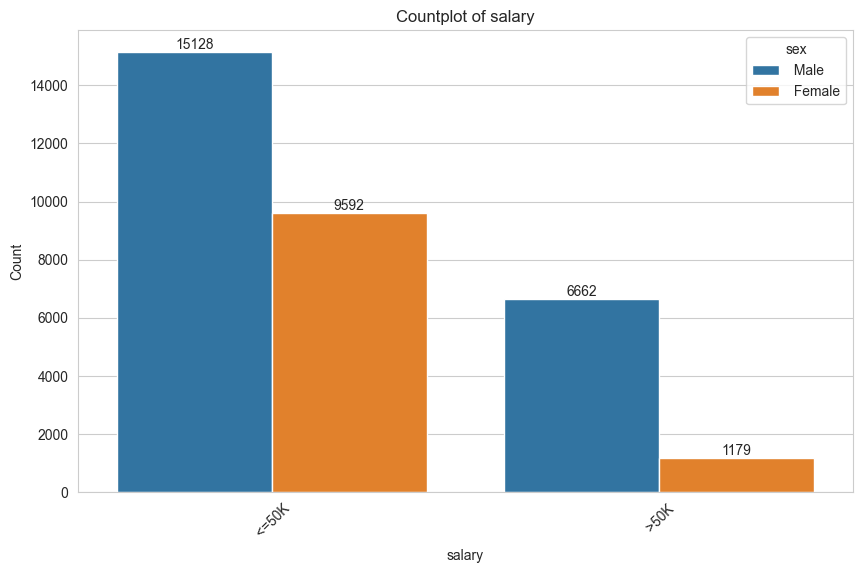

In [19]:
for column in new_categorical_columns:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=column, data=df, hue="sex")
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(f'Countplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45) 
    plt.show()

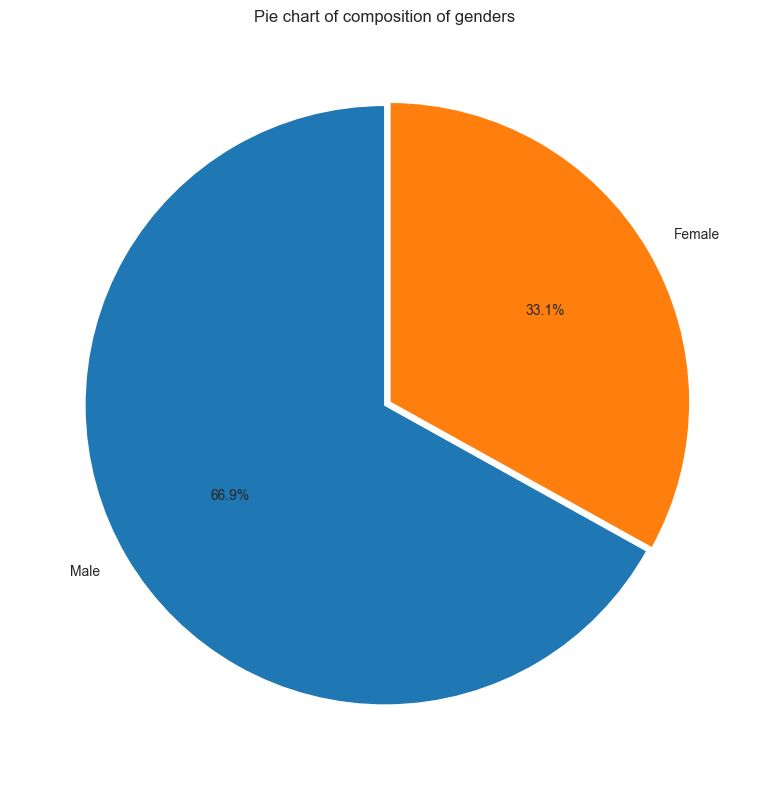

In [20]:
# Setting the size of the figure
plt.figure(figsize=(10, 8))

# Labels for the pie chart segments
labels = ["Male", "Female"]

# Explode parameter to highlight a segment
explode = [0, 0.02]

# Creating a pie chart to show the composition of genders in the data
plt.pie(data=df,                             
        x=df["sex"].value_counts(),        
        labels=labels,                   
        explode=explode,                  
        autopct='%1.1f%%',                
        startangle=90)

# Setting the title of the plot
plt.title("Pie chart of composition of genders")

# Adjusting layout to prevent overlapping of labels
plt.tight_layout()

# Displaying the plot
plt.show()

In [21]:

### converting sex into binary encoding
df['sex'] = df['sex'].map({' Male':1,' Female':0}).astype(int)

In [22]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,0,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,1,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,0,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,1,0,0,20,United-States,<=50K


In [23]:
df["workclass"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

Text(0.5, 1.0, 'Distribution of Age with respect to WorkClass')

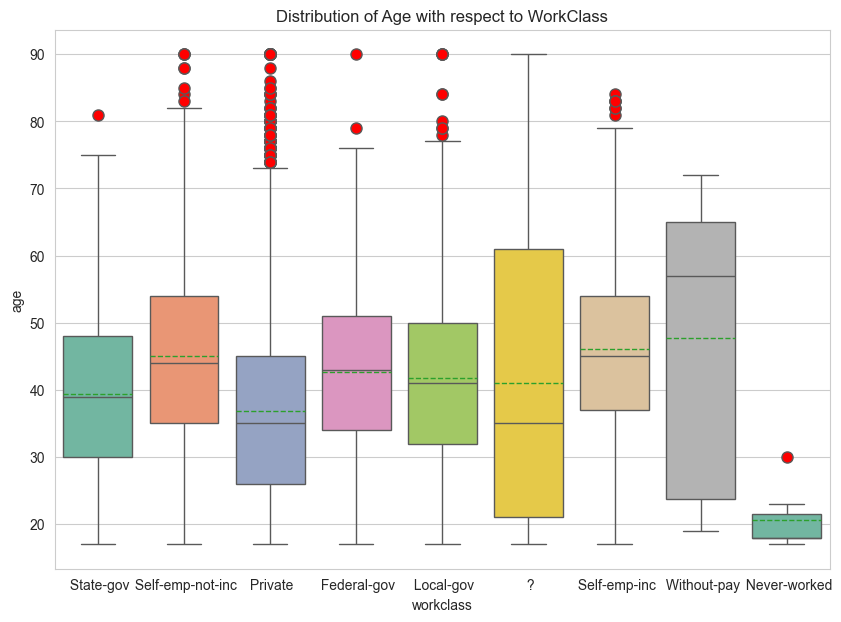

In [24]:
plt.figure(figsize=(10,7))
ax = sns.boxplot(data=df, x='workclass',y='age', palette="Set2", orient='v', showmeans=True, meanline=True, showcaps=True, showfliers=True,flierprops=dict(marker='o', markerfacecolor='red', markersize=8))
plt.title("Distribution of Age with respect to WorkClass")

In [25]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education_num        16
marital_status        7
occupation           15
relationship          6
race                  5
sex                   2
capital_gain        119
capital_loss         92
hours_per_week       94
country              42
salary                2
dtype: int64

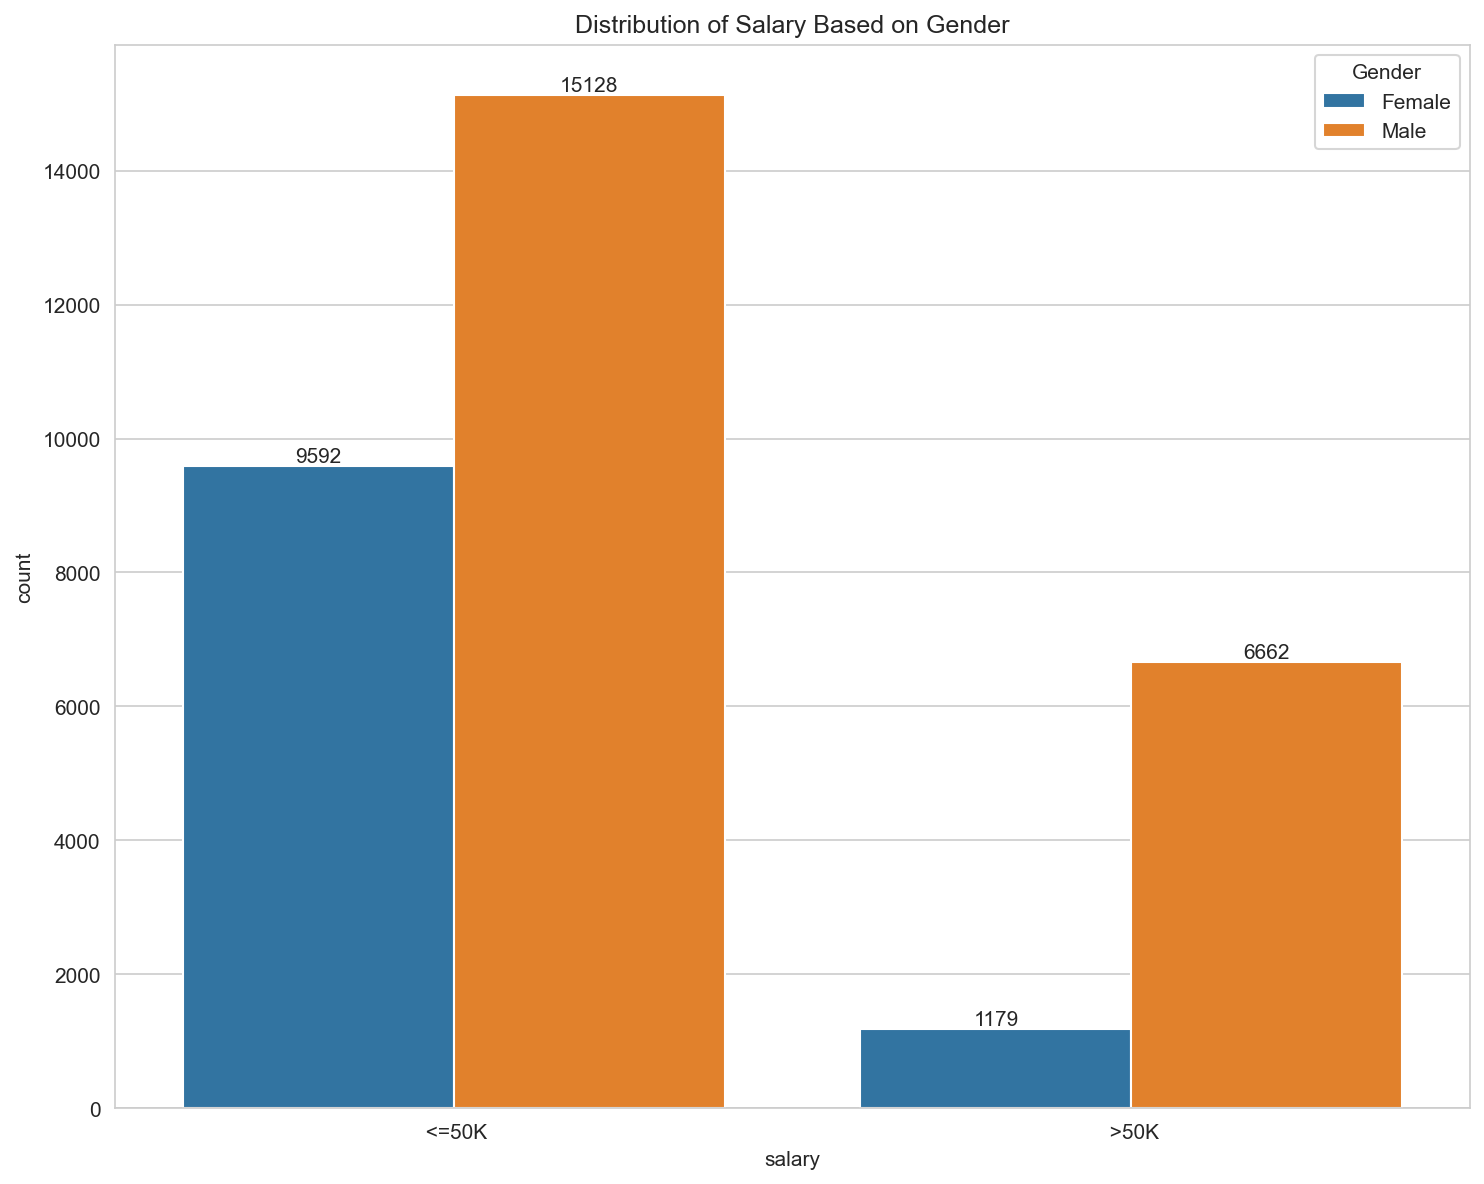

In [26]:
# Define label mapping
label_mapping = {0: 'Female', 1: 'Male'}

# Set the size and DPI of the figure
plt.figure(figsize=(10, 8), dpi=150)

# Create a count plot using Seaborn
salary_cat = sns.countplot(data=df, x="salary", hue="sex")

# Add labels to the bars
for container in salary_cat.containers:
    salary_cat.bar_label(container)

# Set plot title
plt.title("Distribution of Salary Based on Gender")

# Adjust layout
plt.tight_layout()

# Add legend with custom labels
plt.legend(labels=label_mapping.values(), title='Gender')

# Display the plot
plt.show()

In [27]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,0,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,1,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,0,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,1,0,0,20,United-States,<=50K


In [28]:
## converting salary into binary encoding i.e if salary is greater than 50k that it is 1 and less than or equal to to 0
df['salary']=df['salary'].map(
    {
    ' <=50K':1,' >50K':0
    }).astype(int)

In [29]:
df["race"].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

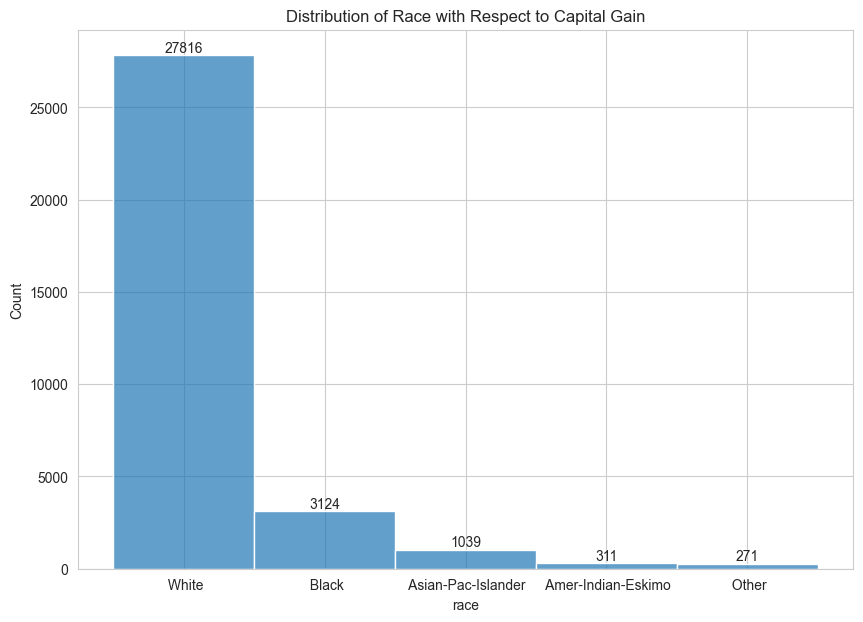

In [30]:
# Set the size of the figure
plt.figure(figsize=(10, 7))

# Create a histogram plot using Seaborn
ax = sns.histplot(data=df, x='race', palette="Set3", alpha=0.7)

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container)

# Set plot title
plt.title("Distribution of Race with Respect to Capital Gain")

# Display the plot
plt.show()

In [31]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,0,0,0,38,United-States,1
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,1,0,0,40,United-States,0
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,0,0,0,40,United-States,1
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,1,0,0,20,United-States,1


In [32]:
df["occupation"].nunique()

15

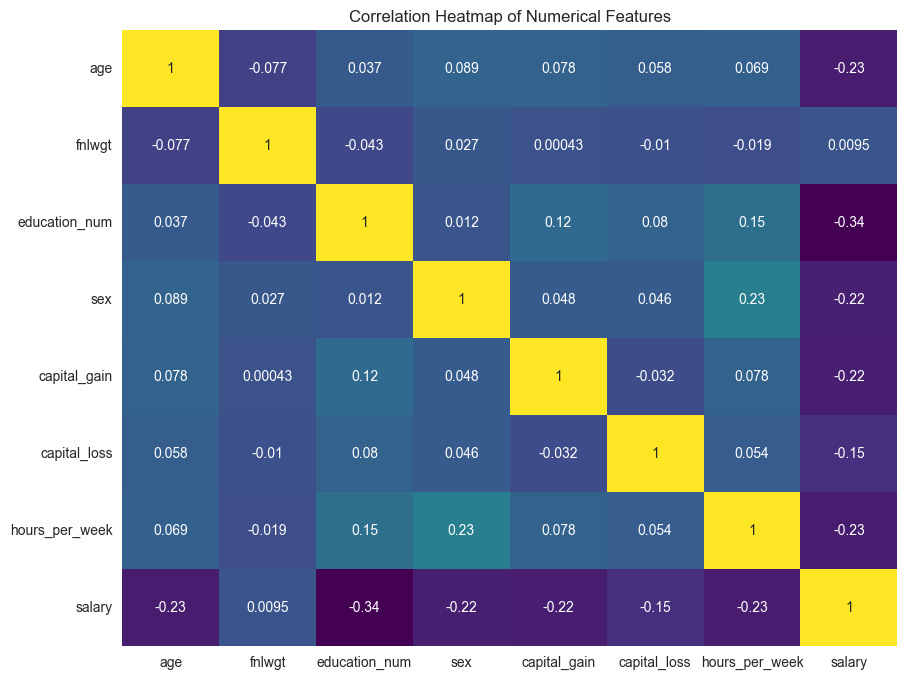

In [33]:
## not including categorical data
numerical_df = df.select_dtypes(include=['int', 'float'])
# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

# Set the size of the figure
plt.figure(figsize=(10, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cbar=False, cmap='viridis')

# Add title to the plot
plt.title('Correlation Heatmap of Numerical Features')

# Display the plot
plt.show()

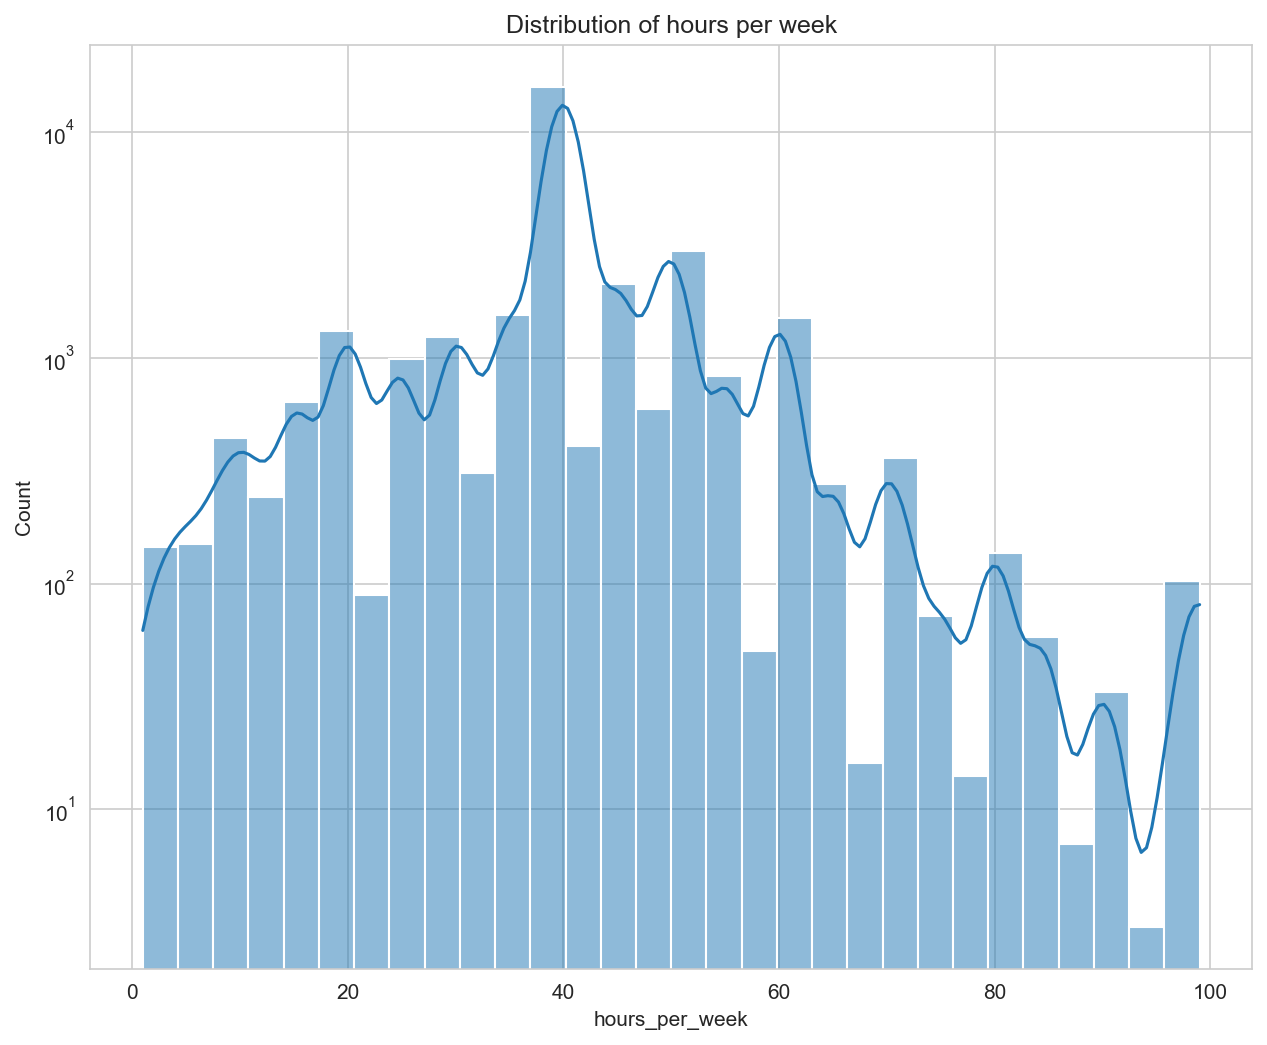

In [874]:
# Plotting a histogram for the 'hours_per_week' feature
# Define the size of the figure and the resolution
plt.figure(figsize=(10, 8), dpi=150)

# Create a histogram plot using Seaborn
ax = sns.histplot(data=df, x="hours_per_week", kde=True, bins=30)

# Set y-axis scale to logarithmic for better visualization of data distribution
ax.set_yscale('log')

# Set title of the plot
plt.title("Distribution of hours per week")

# Display the plot
plt.show()

In [875]:
mean_salary = df[['relationship','salary']].groupby(['relationship']).mean()
mean_salary

,salary
relationship,
Husband,0.551429
Not-in-family,0.896930
Other-relative,0.962283
Own-child,0.986780
Unmarried,0.936738
Wife,0.524872


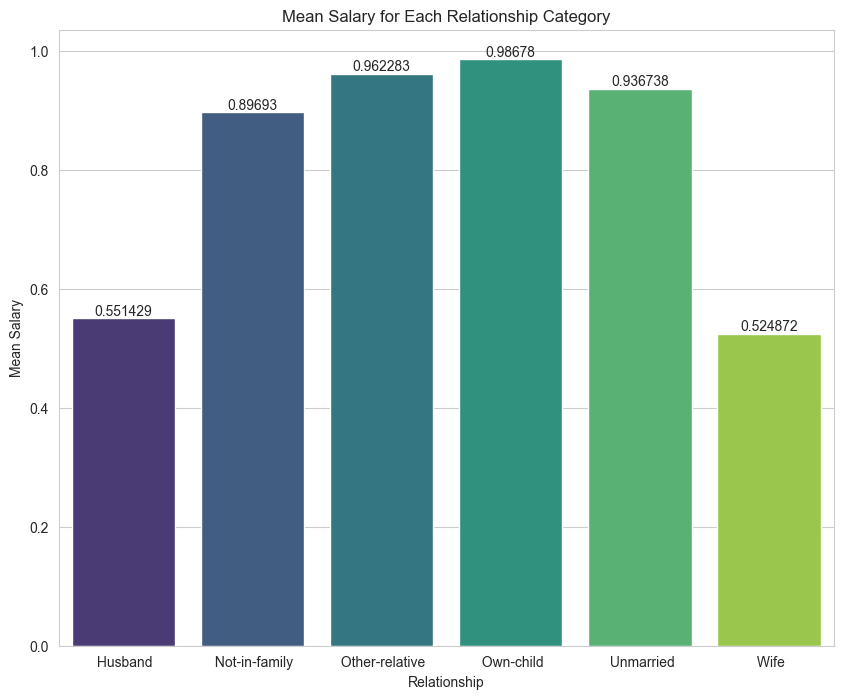

In [876]:
# Plotting a bar plot between relationship and mean salary
# Defining figure size
plt.figure(figsize=(10, 8))

# Creating a bar plot using Seaborn
ax = sns.barplot(x='relationship', y='salary', data=mean_salary, palette='viridis')

# Adding labels to the bars with the mean salary values
for container in ax.containers:
    ax.bar_label(container)

# Adding title and axis labels
plt.title('Mean Salary for Each Relationship Category')
plt.xlabel('Relationship')
plt.ylabel('Mean Salary')

# Displaying the plot
plt.show()


In [877]:
mean_sal_by_race = df[['race','salary']].groupby(['race']).mean()
mean_sal_by_race

,salary
race,
Amer-Indian-Eskimo,0.884244
Asian-Pac-Islander,0.734360
Black,0.876120
Other,0.907749
White,0.744140


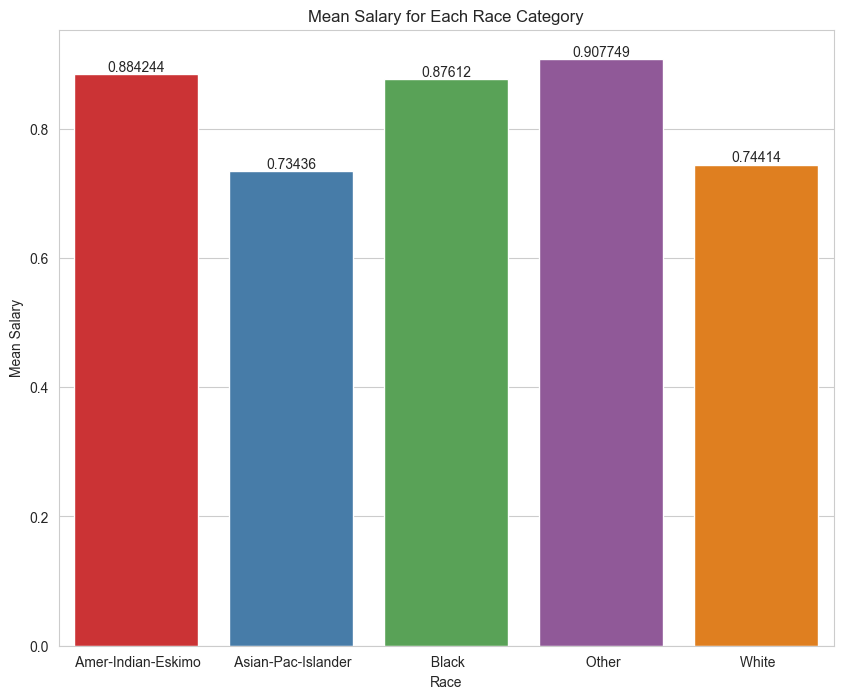

In [878]:
# Set the size of the figure
plt.figure(figsize=(10, 8))

# Create a bar plot using Seaborn
ax = sns.barplot(x='race', y='salary', data=mean_sal_by_race, palette='Set1')

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container)

# Set plot title and axis labels
plt.title('Mean Salary for Each Race Category')
plt.xlabel('Race')
plt.ylabel('Mean Salary')

# Display the plot
plt.show()

In [879]:
df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [880]:
mean_sal_by_occupation = df[['occupation','salary']].groupby(['occupation']).mean()
mean_sal_by_occupation

,salary
occupation,
?,0.896365
Adm-clerical,0.865517
Armed-Forces,0.888889
Craft-repair,0.773359
Exec-managerial,0.515986
Farming-fishing,0.884306
Handlers-cleaners,0.937226
Machine-op-inspct,0.875125
Other-service,0.958422


In [881]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,0,0,0,38,United-States,1
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,1,0,0,40,United-States,0
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,0,0,0,40,United-States,1
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,1,0,0,20,United-States,1


In [882]:
df["country"].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [883]:
def check_special_characters(column_type):
    cols = column_type
    for columns in cols:
            # Define a regular expression pattern for special characters
        special_char_pattern = r'[^\w\s]'

        # Find all special characters in the series
        special_characters = set()
        for item in df[columns]:
            special_chars = re.findall(special_char_pattern, item)
            if special_chars:
                special_characters.update(special_chars)
            
        print(f"{columns} contain special characters: {special_characters}")

In [884]:
cat_cols = df.select_dtypes(include=['object'])
check_special_characters(cat_cols)

workclass contain special characters: {'-', '?'}
education contain special characters: {'-'}
marital_status contain special characters: {'-'}
occupation contain special characters: {'-', '?'}
relationship contain special characters: {'-'}
race contain special characters: {'-'}
country contain special characters: {'-', '&', '(', ')', '?'}


In [885]:
## replacing question mark with space
for columns in cat_columns:
    if columns in ["country","workclass","occupation"]:
        df[columns] = df[columns].replace(' ?', "")

In [886]:
check_special_characters(cat_cols)

workclass contain special characters: {'-'}
education contain special characters: {'-'}
marital_status contain special characters: {'-'}
occupation contain special characters: {'-'}
relationship contain special characters: {'-'}
race contain special characters: {'-'}
country contain special characters: {'-', '&', ')', '('}


In [887]:
df["country"].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', '', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [888]:
mean_sal_by_occupation = df[['occupation','salary']].groupby(['occupation']).mean()
mean_sal_by_occupation

,salary
occupation,
,0.896365
Adm-clerical,0.865517
Armed-Forces,0.888889
Craft-repair,0.773359
Exec-managerial,0.515986
Farming-fishing,0.884306
Handlers-cleaners,0.937226
Machine-op-inspct,0.875125
Other-service,0.958422


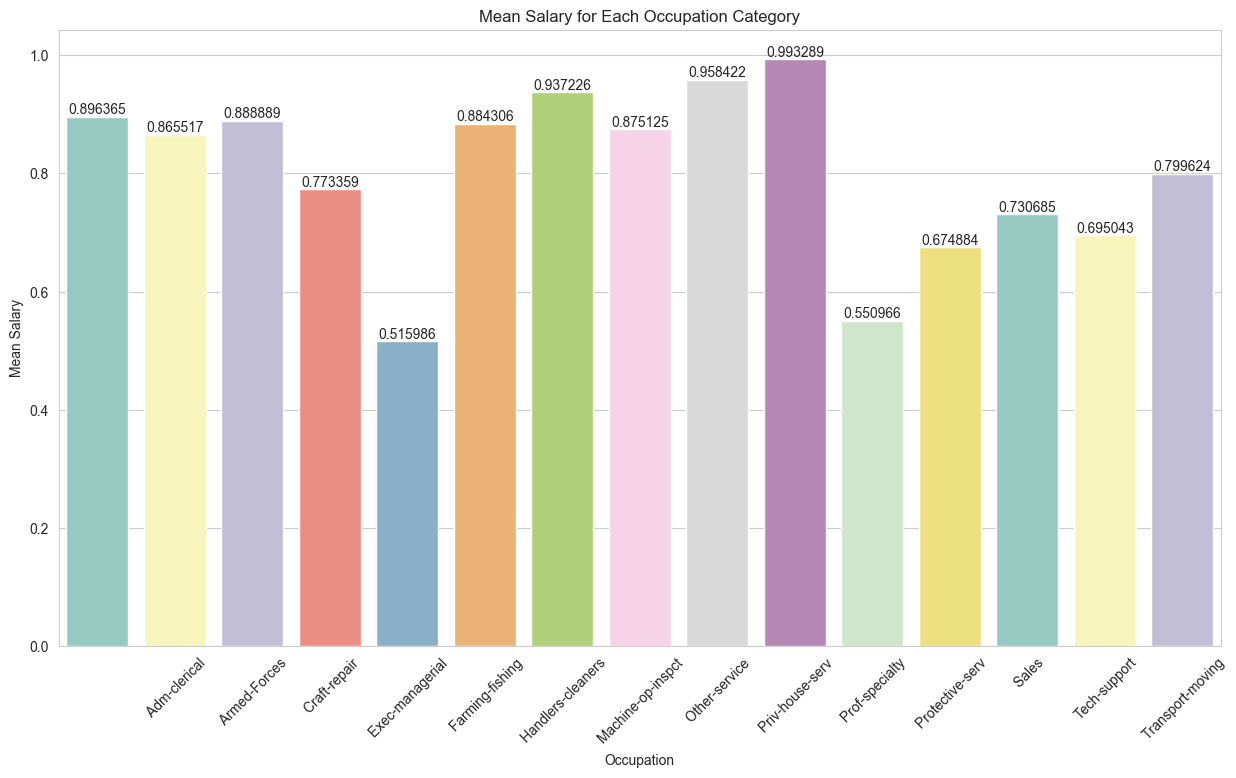

In [889]:
# Set the size of the figure
plt.figure(figsize=(15, 8))

# Create a bar plot using Seaborn
ax = sns.barplot(x='occupation', y='salary', data=mean_sal_by_occupation, palette='Set3')

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container)

# Set plot title and axis labels
plt.title('Mean Salary for Each Occupation Category')
plt.xlabel('Occupation')
plt.ylabel('Mean Salary')

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45) 

# Display the plot
plt.show()

In [890]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', '', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

In [891]:
## creating new column based on the work class
def employement_types(cols):
    if cols['workclass'] == ' Federal-gov' or cols['workclass']== ' Local-gov' or cols['workclass']==' State-gov': 
        return 'govt'
    elif cols['workclass'] == ' Private':
        return 'private'
    elif cols['workclass'] == ' Self-emp-inc' or cols['workclass'] == ' Self-emp-not-inc': 
        return 'self_employed'
    else: 
        return 'free: without_pay'


In [893]:

df.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary,employment_type
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,1,govt
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,1,self_employed
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,1,private
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,1,private
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,1,private
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,0,0,0,40,United-States,1,private
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,0,0,0,16,Jamaica,1,private
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,45,United-States,0,self_employed
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,0,14084,0,50,United-States,0,private
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,5178,0,40,United-States,0,private


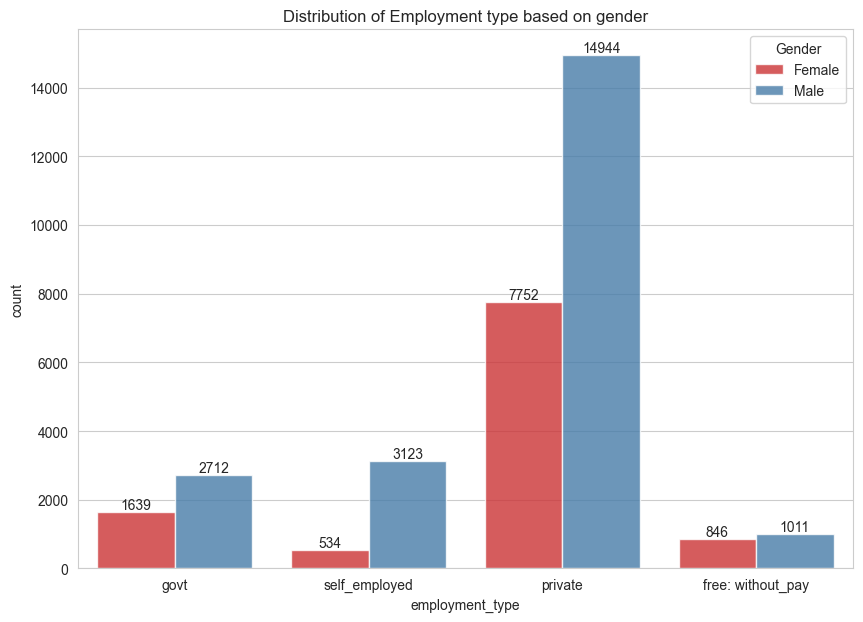

In [894]:
# Define a dictionary to map numerical labels to corresponding categories
label_mapping = {0: 'Female', 1: 'Male'}

# Set the size of the figure
plt.figure(figsize=(10, 7))

# Create a count plot using Seaborn, specifying the DataFrame, x-axis variable, color palette,
# transparency, and hue (for differentiating based on gender)
ax = sns.countplot(data=df, x='employment_type', palette="Set1", alpha=0.8, hue="sex")

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container)

# Add a legend to the plot, specifying custom labels for gender categories
plt.legend(labels=label_mapping.values(), title='Gender')

# Set plot title
plt.title("Distribution of Employment type based on gender")

# Display the plot
plt.show()

In [895]:
employement_type_mean = df[['employment_type',"salary"]].groupby('employment_type').mean()
employement_type_mean

,salary
employment_type,
free: without_pay,0.897146
govt,0.691795
private,0.781327
self_employed,0.631939


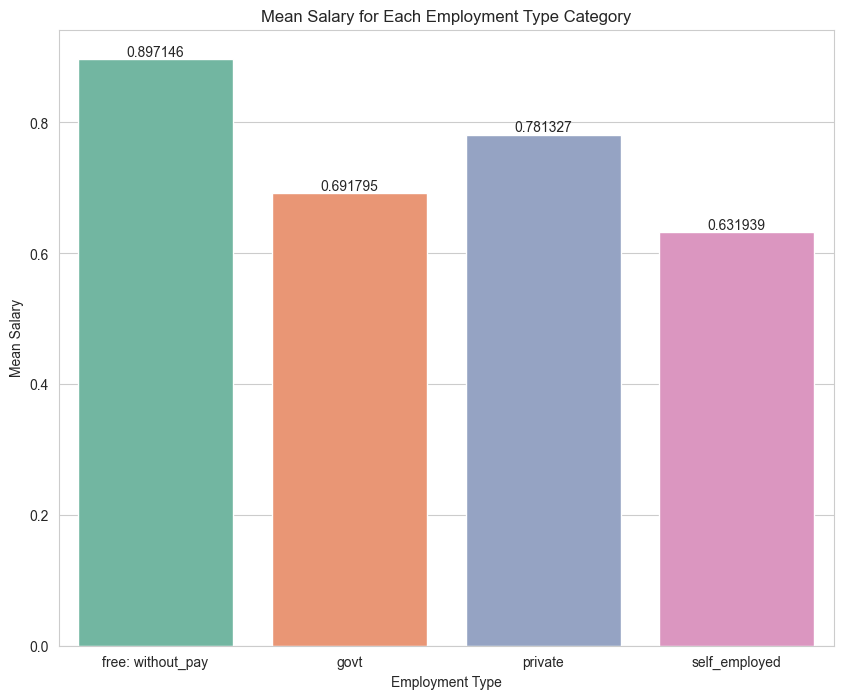

In [896]:
# Set the size of the figure
plt.figure(figsize=(10, 8))

# Create a bar plot using Seaborn, specifying x-axis as 'employment_type', y-axis as 'salary', and data source as 'employment_type_mean'
ax = sns.barplot(x='employment_type', y='salary', data=employement_type_mean, palette='Set2')

# Add labels to the bars indicating the mean salary for each employment type
for container in ax.containers:
    ax.bar_label(container)

# Set plot title and axis labels
plt.title('Mean Salary for Each Employment Type Category')
plt.xlabel('Employment Type')
plt.ylabel('Mean Salary')

# Display the plot
plt.show()

In [897]:
## function to categorize Education
## populationg Other for schooling which is smaller than high school level
def education_category(val):
    if (val==' Preschool'):
        return 'Other'
    elif (val==' 1st-4th'):
        return 'Other'
    elif (val==' 5th-6th'):
        return 'Other'
    elif (val==' 7th-8th'):
        return 'Other'
    elif (val==' 9th'):
        return 'Other'
    elif (val==' 10th'):
        return 'Other'
    elif (val==' 11th'):
        return 'Other'
    elif (val==' 12th'):
        return 'Other'
    else:
        return val

In [898]:
df['education']= df['education'].apply(education_category)

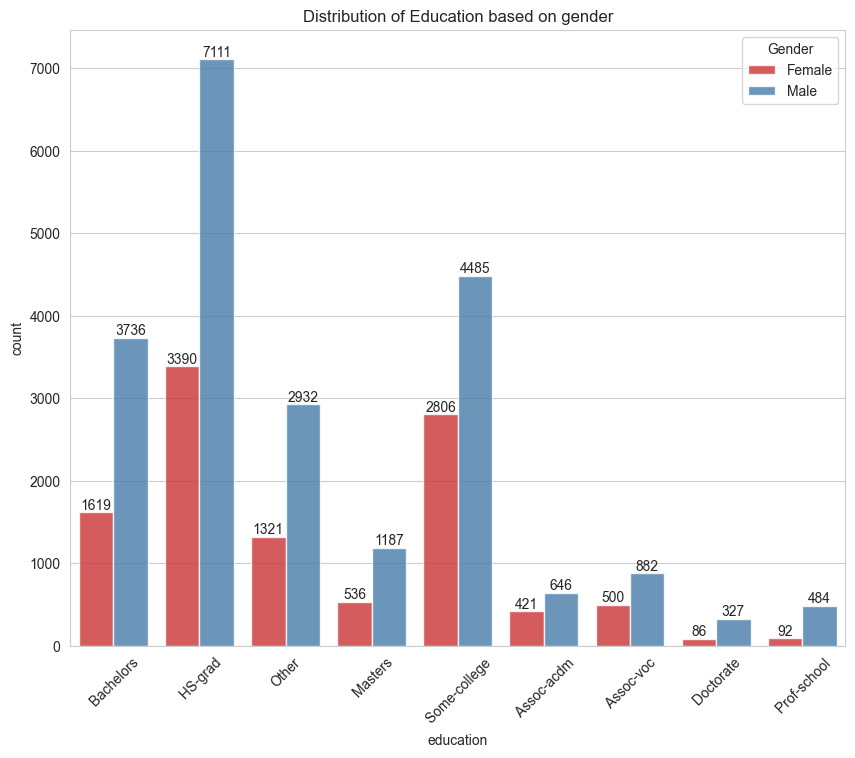

In [899]:
# Define a dictionary to map numerical labels to corresponding gender categories
label_mapping = {0: 'Female', 1: 'Male'}

# Set the size of the figure
plt.figure(figsize=(10, 8))

# Create a count plot using Seaborn
ax = sns.countplot(data=df, x='education', palette="Set1", alpha=0.8, hue="sex")

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container)

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Add legend with custom labels for the hue categories
plt.legend(labels=label_mapping.values(), title='Gender')

# Set plot title
plt.title("Distribution of Education based on gender")

# Display the plot
plt.show()

In [900]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary,employment_type
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,1,govt
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,1,self_employed
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,1,private
3,53,Private,234721,Other,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,1,private
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,1,private
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,0,0,0,38,United-States,1,private
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,1,0,0,40,United-States,0,private
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,0,0,0,40,United-States,1,private
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,1,0,0,20,United-States,1,private


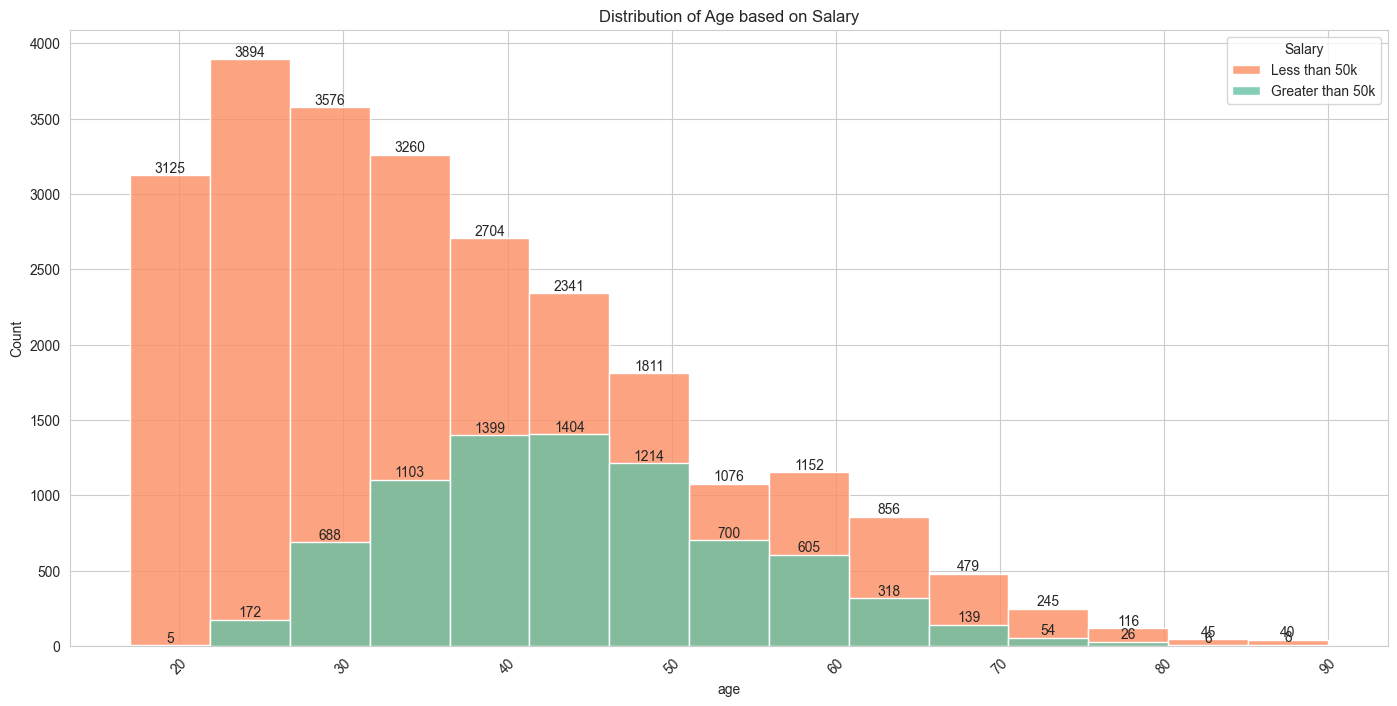

In [933]:
# Set the size of the figure
plt.figure(figsize=(17, 8))

# Create a histogram plot using Seaborn
ax = sns.histplot(data=df, x='age', palette="Set2", alpha=0.8, hue="salary", bins=15)

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container)

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45) 

# Set plot title
plt.title("Distribution of Age based on Salary")

# Add legend explaining salary categories
# - 0 represents 'Less than 50k'
# - 1 represents 'Greater than 50k'
plt.legend(title='Salary', labels=['Less than 50k', 'Greater than 50k'])

# Display the plot
plt.show()

In [902]:
df["country"].value_counts()

country
 United-States                 29170
 Mexico                          643
                                 583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                         

In [903]:
df["country"].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', '', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [904]:
## function to categorize Education
def country_categorization(country):
    if (country != ' United-States'):
        return 0
    else:
        return 1

In [905]:
df['country_cat']= df['country'].apply(country_categorization)

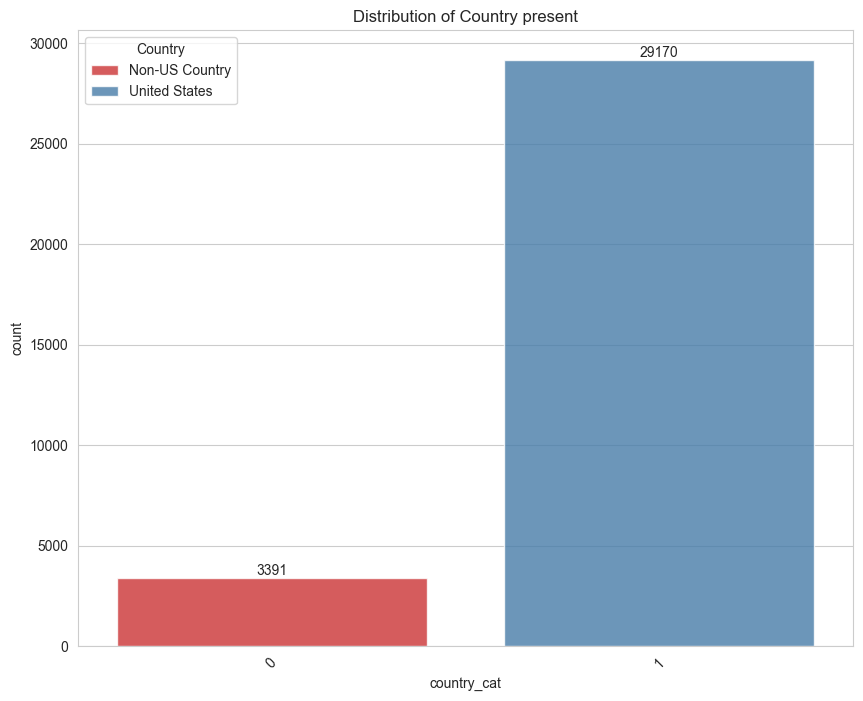

In [906]:
# Define a dictionary to map numerical labels to categorical labels
label_mapping = {0: 'Non-US Country', 1: 'United States'}

# Set the size of the figure and create a count plot using Seaborn
plt.figure(figsize=(10,8))
ax = sns.countplot(data=df, x='country_cat', palette="Set1", alpha=0.8)

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container)

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45) 

# Set plot title and legend
plt.title("Distribution of Country present")
plt.legend(labels=label_mapping.values(), title='Country')

In [907]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary,employment_type,country_cat
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,1,govt,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,1,self_employed,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,1,private,1
3,53,Private,234721,Other,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,1,private,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,1,private,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,0,0,0,38,United-States,1,private,1
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,1,0,0,40,United-States,0,private,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,0,0,0,40,United-States,1,private,1
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,1,0,0,20,United-States,1,private,1


In [908]:
maritial_status_mean_sal = df[['marital_status','salary']].groupby(['marital_status']).mean()
maritial_status_mean_sal

,salary
marital_status,
Divorced,0.895791
Married-AF-spouse,0.565217
Married-civ-spouse,0.553152
Married-spouse-absent,0.918660
Never-married,0.954039
Separated,0.935610
Widowed,0.914401


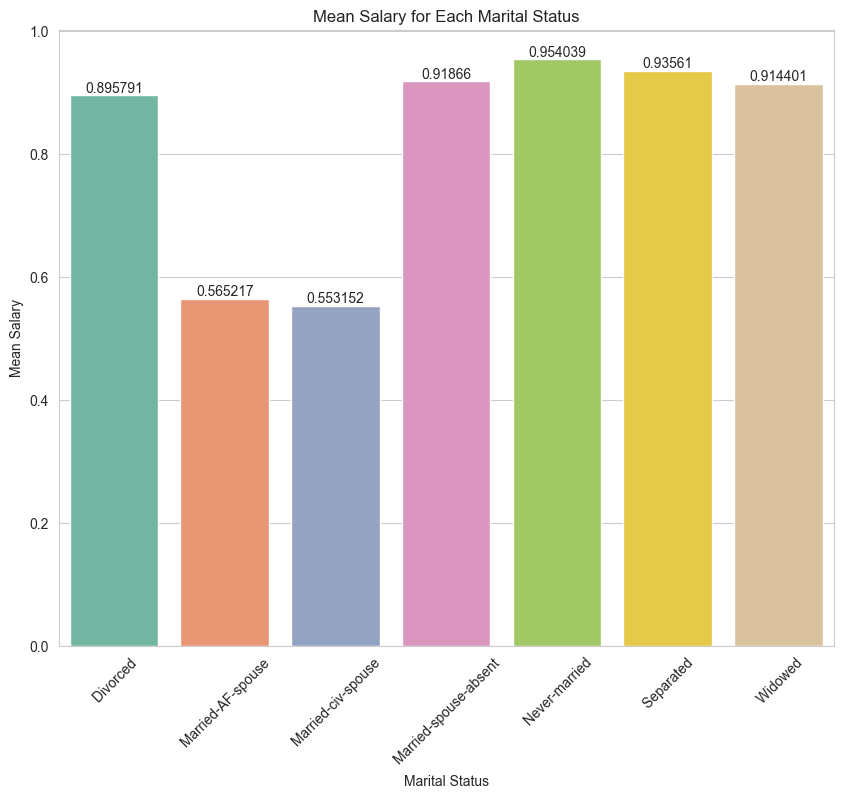

In [909]:

# Set the size of the figure
plt.figure(figsize=(10, 8))

# Create a bar plot using Seaborn
ax = sns.barplot(data=maritial_status_mean_sal, x='marital_status', y='salary', palette='Set2')

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container)

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45) 

# Set plot title and axis labels
plt.title('Mean Salary for Each Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Mean Salary')

# Display the plot
plt.show()

In [910]:
# Define a function to categorize hours worked into three categories: "<40 Hrs", "40 Hrs", and ">40 Hrs"
def categorize_hours_worked(hours):
    # Check if hours worked is less than 40
    if hours < 40:
        return("<40 Hrs")
    # Check if hours worked is equal to 40
    elif hours == 40:
        return("40 Hrs")
    # If hours worked is greater than 40
    else:
        return(">40 Hrs")

In [911]:
df['hours_categorized']=df['hours_per_week'].apply(categorize_hours_worked)

In [912]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary,employment_type,country_cat,hours_categorized
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,1,govt,1,40 Hrs
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,1,self_employed,1,<40 Hrs
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,1,private,1,40 Hrs
3,53,Private,234721,Other,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,1,private,1,40 Hrs
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,1,private,0,40 Hrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,0,0,0,38,United-States,1,private,1,<40 Hrs
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,1,0,0,40,United-States,0,private,1,40 Hrs
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,0,0,0,40,United-States,1,private,1,40 Hrs
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,1,0,0,20,United-States,1,private,1,<40 Hrs


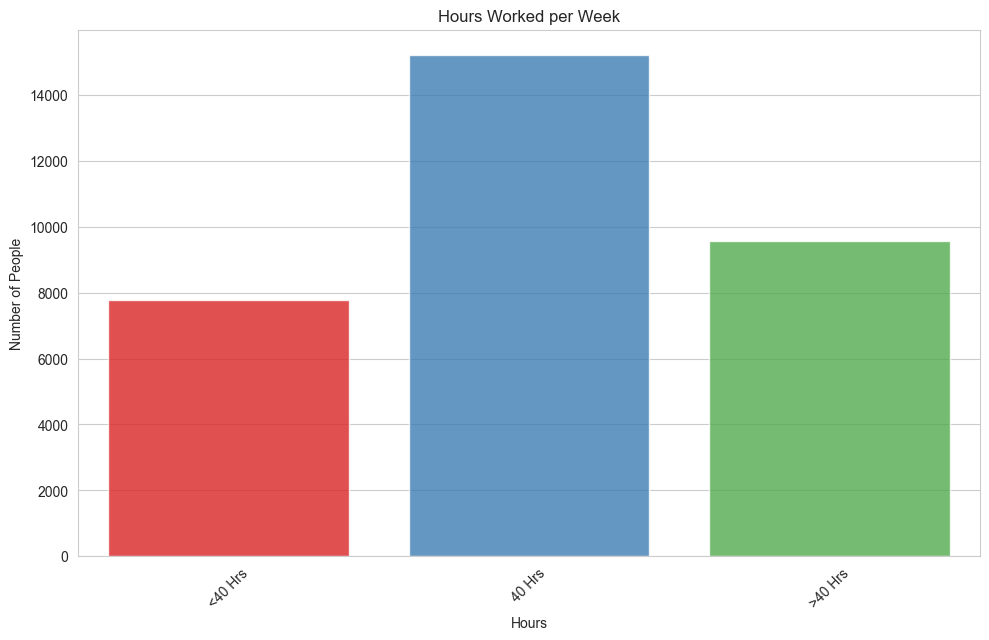

In [913]:

# Set the size of the figure
plt.figure(figsize=(10, 6))

# Create a count plot of 'hours_categorized' column from DataFrame 'df'
# using Seaborn, specifying the palette, saturation, alpha, and order of categories
ax = sns.countplot(x=df['hours_categorized'], palette='Set1', saturation=0.9, alpha=0.8, order=['<40 Hrs', '40 Hrs', '>40 Hrs'])

# Adjust layout to prevent overlap of labels
plt.tight_layout()

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45) 

# Set plot title and axis labels
plt.title('Hours Worked per Week')
plt.xlabel('Hours')
plt.ylabel('Number of People')

# Display the plot
plt.show()